# MAE 301 Homework 1

There are multiple ways to complete this assignment. However, a convenient way is to download this notebook, install Anaconda, and complete the questions in new cells directly below using the IPython notebook environment. Another way is to complete written questions by hand, and to use the cloud-based IDE DataJoy to copy-paste and then complete the scripting portion. More information can be found under Problem 2. 

## Problem 1: Review of linear algebra and calculus (45pt)

### (5pt)
Let ${\bf c}$ be a *column vector*: ${\bf c} = [c_1, c_2, \cdots, c_n]^T$ where ``$T$'' *transposes* a vector (or matrix) and $n$ is the number of elements in the vector. Let ${\bf x}$ be another column vector of the same size. Write out the explicit expression of the vector product ${\bf c}^T{\bf x}$.






**This is the dot product of the vectors ${\bf c}$ and ${\bf x}$, which can be written as $\sum_{i=1}^n c_i x_i = [c_1x_1+c_2x_2 + \cdots + c_nx_n$]**

### (10pt)
Introduce a function $f({\bf x}) = {\bf c}^T{\bf x}$, i.e., the value of $f$ changes with ${\bf x}$. Write out the * gradient* of $f({\bf x})$. (Hint: the gradient is defined as the row vector: $[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \cdots, \frac{\partial f}{\partial x_n}]$.)

**Using the above, the first gradent will be:** $\frac{\partial}{\partial x_1} \sum_{i=1}^n c_i x_i = c_1 $, **since all other terms are constant and go to zero. Continuing with the other terms, we get $\nabla f = [c_1, c_2, \cdots, c_n] = {\bf c}^T$. Note then, that $\frac{\partial}{\partial {\bf x}}  {\bf c}^T{\bf x} = {\bf c}^T$, as expected.**

### (10pt)
 Let $h({\bf x}) = \frac{1}{2}{\bf x}^T{\bf H}{\bf x}$ be another function. Write out its gradient and *Hessian*. (Hint: Hessian is the gradient of the gradient. Also note that ${\bf H}$ is a square matrix.)

**The gradient $\nabla h = \frac{1}{2}{\bf x}^T\left({\bf H}+{\bf H}^T\right)$**

**The Hessian is therefore $\nabla^2 h = \frac{1}{2}\left({\bf H}+{\bf H}^T\right)$**

### (10pt)
 For the following function
$$
f({\bf x}) = \frac{1}{2}{\bf x}^T{\bf H}{\bf x} + {\bf c}^T{\bf x},
$$
write out the expression of a *stationary point*. (Hint: A stationary point is such ${\bf x}$ that set the gradient to zero.)


**By the parts (b) and (c), the gradient (equal to zero here), $\nabla f$, will be **

$\nabla f = \frac{1}{2}{\bf x}^T\left({\bf H}+{\bf H}^T\right) + {\bf c}^T = 0$

**Rearrange:  $\left({\bf H}+{\bf H}^T\right){\bf x} = 2{\bf c} \\ \rightarrow {\bf x} = 2\left({\bf H}+{\bf H}^T\right)^{-1}{\bf c}$**


### (10pt)
 In what condition will the stationary point be a *maximum* or a *minimum*? If you are not sure, try to google the solution, keywords: ``quadratic function minimum/maximum matrix form'')

**By part (c), the hessian $\nabla^2 f = \frac{1}{2}\left({\bf H}+{\bf H}^T\right)$ . To be a maximum, the hessian must be negative definite. **

**To be a minimum, the Hessian must be positive definite. **

## Problem 2: Introduction to Python (50pt)

Python is an *open source* scripting language often used for high-performance scientific computing purposes.
A Python (Numpy) tutorial for MATLAB users can be found [here](http://mathesaurus.sourceforge.net/matlab-numpy.html). 

### Installation
* Option 1 (Online): Use the *free* version of [DataJoy](https://www.getdatajoy.com/)
* Option 2 (Offline): Download and install [Anaconda](http://continuum.io/downloads)

Once anaconda is installed, you would simply run 
```
ipython notebook
```
in the command line/terminal to get started writing your own code. 

NB: ensure IPython is installed from the Conda Repository after installing Anaconda by running 
```
conda install ipython
```
just to be safe. You **cannot** run an ipython notebook from inside Datajoy...you will need to copy/past the code and run it directly. 

Two of the most important packages are **Numpy** and **Matplotlib**. The first is a matrix and numerical analysis package, and the second is a plotting/graphics library. Both are included in **Scipy**, which is included in **Anaconda** (along with many others, lucky us!). Let's use them now...in python it's as easy as importing!

![alt text](https://imgs.xkcd.com/comics/python.png "Thanks to Randall Munroe over @XKCD")

Image from https://imgs.xkcd.com/comics/python.png

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In Numpy, arrays are like matrices in Matlab BUT **indexed from 0!!!** (as it should be...). But, the * operator is not a vector product. Numpy does not assume any dimension, so the arrays can be N-dimensional. Use `np.dot()` for basic linear algebra.  

In [4]:
x = np.array([[1,2]]).T
A = np.array([[1,3],[4,2]])
A.dot(x)

array([[7],
       [8]])

However, if the need arises there is a `Matrix` class in numpy, that you may use for pure linear algebra. The docs reccomend to use the (much faster) arrays whenever possible. 


In [5]:
M = np.matrix([[1, 3],[4,2]])
b = np.matrix([1,2]).T
np.linalg.solve(M,b)

matrix([[ 0.4],
        [ 0.2]])

Let's do something more interesting...how about using probabilities to esimate $\pi$. We're going to throw thousands of rocks uniformly around on a square field. But, there's a quarter of a pond on this field, with a perfectly circular shape. This is called a *Monte Carlo* simulation. 

To do this, we will import the *random* package.

### (20pts)
Show how we can derive $\pi$ if all we know are the $(x,y)$ coordinates of the rocks, and the radius $r$ of the pond

**Let the set of rocks be $R$. For a given $(x_i, y_i)\in R$, the rock will be *in the pond* if its vector magnitude is less than the radius of the pond. $\sqrt{x_i^2+y_i^2}\leq r$. Denote the set of rocks in the pond, then, as $P = \left\{ (x_i, y_i) : \sqrt{x_i^2+y_i^2}\leq r\right\}$. **

**The Area of the square yard, with a side equal to the radius of the circle, is $r^2$. The Area of the quarter-pond is $\frac{1}{4}\pi r^2$. The Probability that a uniform random variable (a thrown rock) will land in the area of the pond specifically is the ratio of pond area to total available area, i.e.,$\frac{1}{4}\pi\frac{r^2}{r^2} = \frac{\pi}{4}$**. 

**Therefore, we would expect the ratio number of rocks in (or the size of) the set $P$ and the set $R$ to be approximately this probability. In other words,**
$$4\frac{|P|}{|R|} \approx \pi$$

In [6]:
import random
%matplotlib inline


iterations=10000
pi=0
counter=0
in_circle=0
x_point=random.random()
y_point=random.random()
estimates=[]
average=[]

in_pts_x=[] #
in_pts_y=[]
x_pts=[]
y_pts=[]

while counter<iterations:
    if x_point**2 + y_point**2 <=1:
        counter+=1
        in_circle+=1
        x_pts+=[x_point]
        y_pts+=[y_point]
        in_pts_x+=[x_point]
        in_pts_y+=[y_point]
    else:
        counter+=1
        x_pts+=[x_point]
        y_pts+=[y_point]
    ratio = in_circle/float(counter)
    pi=4*ratio
         
    estimates+=[pi]
    
    #a floating average, mean of the last 1000 values given
    average+=[np.mean(estimates[-1000:])]

    x_point=random.random()
    y_point=random.random()
                    
print 'The integer approx is ', in_circle,'/',counter,'=',pi,' and the best adjusted value is',average[-1]

The integer approx is  7853 / 10000 = 3.1412  and the best adjusted value is 3.13693650952


Now we would like to see what exactly is going on...remember I told you about MatPlotLib? There are two ways to use this: with Matlab style syntax, or with a more Python-esque object oriented syntax (which is what I will be using below). For a wonderful look at many of the things Matplotlib can offer, look at [this tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). 

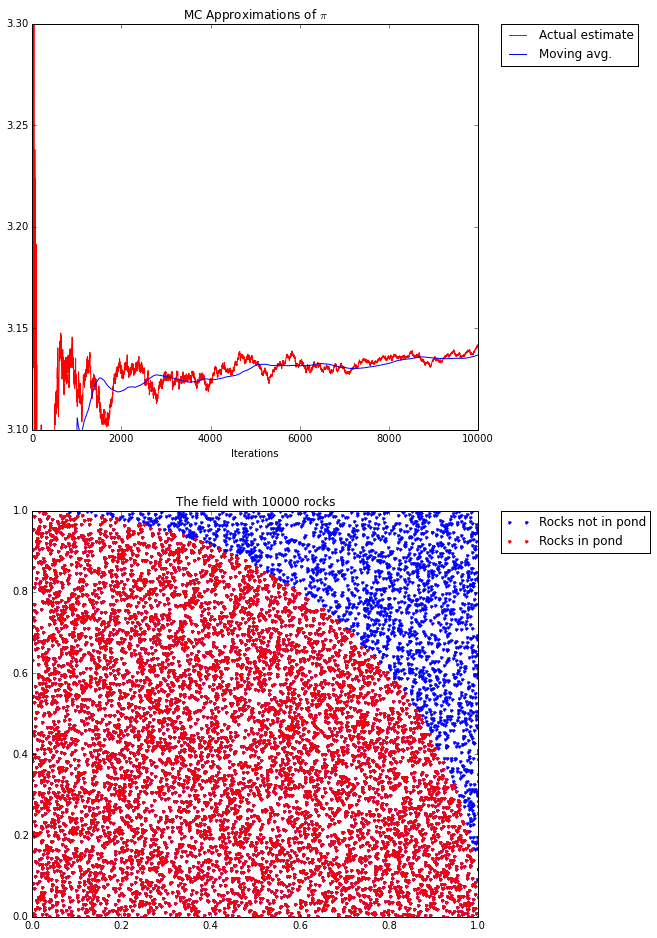

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,16))

ax[0].plot(estimates,'r-',average,'b-')
ax[0].axis([0,iterations,3.1,3.3])
ax[0].set_title(r'MC Approximations of $\pi$')
ax[0].set_xlabel('Iterations')
ax[0].legend(('Actual estimate','Moving avg.'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax[1].plot(x_pts,y_pts,'b.', label='Rocks not in pond')
ax[1].plot(in_pts_x,in_pts_y,'r.', label='Rocks in pond')
ax[1].axis([0,1,0,1])
ax[1].set_title('The field with '+str(iterations)+' rocks')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### (10pts)
To ensure that the rocks were indeed thrown uniformly, we can plot the histograms of both $x$ and $y$ coordinates using `plt.hist()`. 

*hint:* you can pass multiple lists of data to `plt.hist()` by putting them into another list like `[x, y]`. 

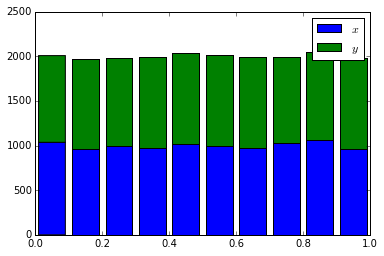

In [9]:
plt.hist( [x_pts, y_pts] , stacked=True)
plt.legend((r'$x$',r'$y$'),loc=0)
##Looks good.


### (20pts)
See if you can write a script to continue throwing rocks in the pond until you reach a value for $\pi$ with arbitrary accuracy (i.e. between two other numbers, one above $\pi$, and one below). 

In [10]:
import random
def arb_pi(low,hi):
    
    #Input the starting vars here (see above)
    #HINT Do we need to keep all of the estimates?
    
    pi=0
    counter=0
    in_circle=0
    x_point=random.random()
    y_point=random.random()
    
    while pi<low or pi>hi:
        if x_point**2 + y_point**2 <=1:
            counter+=1
            in_circle+=1
        else:
            counter+=1
            
        ratio = in_circle/float(counter)
        pi=4*ratio
        
        x_point=random.random()
        y_point=random.random()

    #-------leave this--------#
    print 'this took',in_circle, ' out of ', counter, 'points'
    print 'this estimate has a percent error of', 100*(np.pi-pi)/np.pi,'%'
    return pi
    #-------------------------#
print arb_pi(3.141592,3.141593)
#These two should give an approximation with ~ 1e-6 error.

this took 1065  out of  1356 points
this estimate has a percent error of -8.49136787674e-06 %
3.14159292035


Lastly, please take a look at the [IPython Notebook Viewer](http://nbviewer.ipython.org/) website for some really cool demos. Enjoy!

## Problem 3: Survey (5pts)

Please go to [this form](https://docs.google.com/forms/d/1KxtmZq_f1-F0c7pS0hTMq6bm4adV0nP5MVHgEs4fb5o/viewform?usp=send_form) and answer the short survey. Note: You will get all points as long as you complete and submit the survey. Thanks!